In [10]:
#Import Packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn import tree
import numpy as np
import json

In [11]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/home/borna/ProcessMining/Assignments/Process_Mining/conformance_checking/data/df_for_decision_tree.csv')

# Display the first few rows of the dataframe
df.head()

,trace_number,start_log_moves,start_model_moves,A-Create-Application_log_moves,A-Create-Application_model_moves,A-Submitted_log_moves,A-Submitted_model_moves,W-Handle-leads-schedule_log_moves,W-Handle-leads-schedule_model_moves,W-Handle-leads-withdraw_log_moves,...,W-Handle-leads-ate-abort_model_moves,W-Shortened-completion-schedule_log_moves,W-Shortened-completion-schedule_model_moves,W-Shortened-completion-start_log_moves,W-Shortened-completion-start_model_moves,W-Shortened-completion-suspend_log_moves,W-Shortened-completion-suspend_model_moves,W-Call-after-offers-withdraw_log_moves,W-Call-after-offers-withdraw_model_moves,case:throughput_time
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 days 15:06:16.631000
1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 days 04:47:52.288000
2,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 days 02:13:02.807000
3,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21 days 20:18:42.905000
4,4,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 days 02:25:54.292000


In [12]:
class DecisionTreeModel:
    """
    A class used to represent a Decision Tree Model for predicting case throughput time.

    Attributes
    ----------
    json_file_path : str
        The path to the JSON file containing the parameter grid for GridSearchCV.
    random_state : int
        The seed used by the random number generator.
    test_size : float
        The proportion of the dataset to include in the test split.
    grid_search : GridSearchCV, optional
        The GridSearchCV object after fitting the model.

    Methods
    -------
    load_param_grid():
        Loads the parameter grid from a JSON file.
    
    preprocess_data(df):
        Preprocesses the input DataFrame by filling missing values, excluding certain columns, and converting the target variable to hours.
    
    train_model(df):
        Trains the Decision Tree model using GridSearchCV to find the best parameters.
    
    Returns
    -------
    dict
        The parameter grid dictionary.
    """
    def __init__(self, json_file_path='param_grid.json', random_state=42, test_size=0.2):
        self.json_file_path = json_file_path
        self.random_state = random_state
        self.test_size = test_size
        self.grid_search = None

    def load_param_grid(self):
        with open(self.json_file_path, 'r') as file:
            param_grid = json.load(file)
        return param_grid

    def preprocess_data(self, df):
        df_filled = df.fillna(-1)
        columns_to_exclude = ["trace_number", "None_log_moves", "None_model_moves"]
        X = df_filled.drop(columns=columns_to_exclude + ["case:throughput_time"])
        y = df_filled["case:throughput_time"]
        y_timedelta = pd.to_timedelta(y)
        y_hours = y_timedelta.apply(lambda x: x.total_seconds() / 3600)
        return X, y_hours

    def train_model(self, df):
        X, y_hours = self.preprocess_data(df)
        X_train, X_test, y_train, y_test = train_test_split(X, y_hours, test_size=self.test_size, random_state=self.random_state)
        param_grid = self.load_param_grid()
        tree_regressor = DecisionTreeRegressor(random_state=self.random_state)
        self.grid_search = GridSearchCV(
            estimator=tree_regressor,
            param_grid=param_grid,
            cv=5,
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            verbose=2
        )
        self.grid_search.fit(X_train, y_train)
        print("Best Parameters found in Grid Search:", self.grid_search.best_params_)

# Usage
model = DecisionTreeModel(json_file_path='param_grid.json', random_state=42, test_size=0.2)
model.train_model(df)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=50, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=50, min_samples_split=80; total time=   0.0s


Model Performance:
Best Parameters: {'max_depth': 5, 'max_features': 12, 'min_samples_leaf': 50, 'min_samples_split': 60}
Mean Absolute Error (MAE): 163.14 hours
Root Mean Squared Error (RMSE): 234.49 hours
R-squared (R2): 0.17
  Actual Throughput Time (Hours) Predicted Throughput Time (Hours)
0        20 days 00:56:41.258000        15 days 14:01:44.561808001
1     41 days 08:53:06.929999998        16 days 06:42:27.698897476
2      8 days 11:57:34.908999998        17 days 18:20:31.059146788
3     21 days 18:28:18.203999998        17 days 09:39:03.999137364
4      0 days 00:57:59.281999999         6 days 19:27:58.216857141
Decision tree figure saved as decision_tree.png


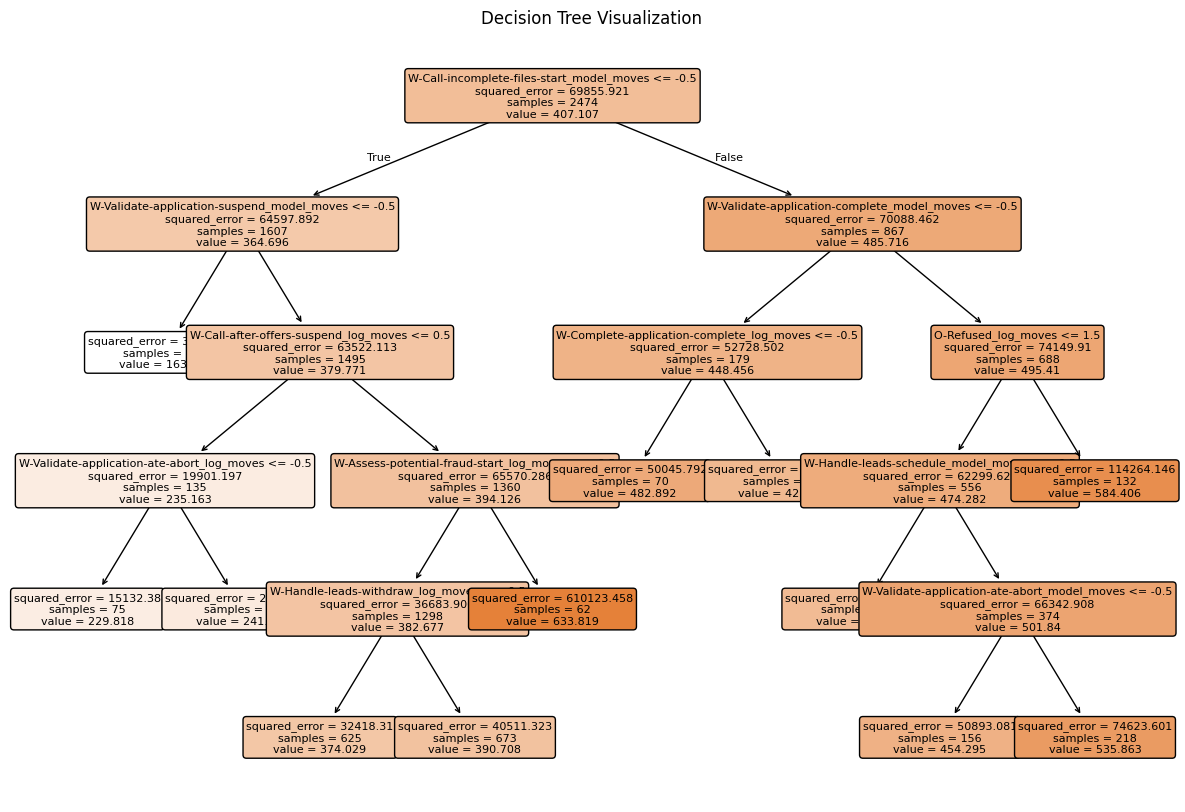

In [15]:
class DecisionTreeEvaluator:
    """
    A class used to evaluate a trained Decision Tree model for predicting case throughput time.

    Methods
    -------
    evaluate_model(grid_search, X_test, y_test, save_fig=False, fig_path='decision_tree.png'):
        Evaluates the best model from the grid search on the test set and calculates evaluation metrics.
    """

    @staticmethod
    def evaluate_model(grid_search, X_test, y_test, save_fig=False, fig_path='decision_tree.png'):
        """
        Evaluates the best model from the grid search on the test set and calculates evaluation metrics.

        Parameters
        ----------
        grid_search : GridSearchCV
            The GridSearchCV object after fitting the model.
        X_test : DataFrame
            The test set features.
        y_test : Series
            The actual throughput time in hours for the test set.
        save_fig : bool, optional
            Whether to save the decision tree figure as a PNG file (default is False).
        fig_path : str, optional
            The path to save the decision tree figure if save_fig is True (default is 'decision_tree.png').

        Returns
        -------
        dict
            A dictionary containing the evaluation metrics and the first few results for interpretation.
        """
        # Extract the best model from the grid search
        best_tree_model = grid_search.best_estimator_

        # Evaluate the best model on the test set
        y_pred_hours = best_tree_model.predict(X_test)

        # Convert predictions back to timedelta format for interpretation
        y_pred_timedelta = pd.Series(y_pred_hours).apply(lambda hours: pd.to_timedelta(hours, unit='h'))
        y_test_timedelta = pd.Series(y_test).apply(lambda hours: pd.to_timedelta(hours, unit='h'))

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred_hours)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_hours))
        r2 = r2_score(y_test, y_pred_hours)

        print("Model Performance:")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Mean Absolute Error (MAE): {mae:.2f} hours")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f} hours")
        print(f"R-squared (R2): {r2:.2f}")

        # Display first few results for interpretation
        results_df = pd.DataFrame({
            'Actual Throughput Time (Hours)': y_test_timedelta.reset_index(drop=True),
            'Predicted Throughput Time (Hours)': y_pred_timedelta
        })
        print(results_df.head())

        # Visualize the decision tree to understand decision rules
        plt.figure(figsize=(15, 10))
        tree.plot_tree(best_tree_model, feature_names=X_test.columns, filled=True, rounded=True, fontsize=8)
        plt.title("Decision Tree Visualization")

        if save_fig:
            plt.savefig(fig_path)
            print(f"Decision tree figure saved as {fig_path}")

        plt.show()

        return {
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'results_df': results_df
        }

# Usage
evaluator = DecisionTreeEvaluator()
evaluation_results = evaluator.evaluate_model(grid_search, X_test, y_test, save_fig=True, fig_path='decision_tree.png')

In [16]:
from typing import List, Dict, Tuple
import pandas as pd
from sklearn.tree import _tree

def extract_rules_from_tree(decision_tree_model, feature_names: List[str], target_name: str) -> List[Dict[str, any]]:
    """
    Extract rules by traversing from the root to each leaf in the trained decision tree model.
    
    Parameters
    ----------
    decision_tree_model : sklearn.tree.DecisionTreeRegressor
        The trained decision tree model from which to extract path-based rules.
    feature_names : List[str]
        List of feature names to interpret tree splits.
    target_name : str
        The name of the target variable, for leaf-level output interpretation.
        
    Returns
    -------
    List[Dict[str, any]]
        A list of dictionaries, each representing a rule with:
            - 'conditions': List of conditions (feature, operator, threshold) for the path.
            - 'average_gini': Average Gini impurity encountered along the path.
            - 'final_gini': Gini impurity at the leaf node.
            - 'average_throughput_time': Average value of target (throughput time) at the leaf node.
    """
    tree_ = decision_tree_model.tree_
    rules = []

    def traverse(node: int, conditions: List[Tuple[str, str, float]], gini_values: List[float]):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:  # Not a leaf node
            # Extract feature name and threshold
            feature = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            gini = tree_.impurity[node]

            # Traverse left (feature <= threshold)
            left_conditions = conditions + [(feature, "<=", threshold)]
            traverse(tree_.children_left[node], left_conditions, gini_values + [gini])

            # Traverse right (feature > threshold)
            right_conditions = conditions + [(feature, ">", threshold)]
            traverse(tree_.children_right[node], right_conditions, gini_values + [gini])
        
        else:
            # Leaf node, create a rule
            final_gini = tree_.impurity[node]
            avg_gini = sum(gini_values) / len(gini_values) if gini_values else final_gini
            avg_throughput_time = tree_.value[node][0][0]  # Mean target value at leaf
            
            rule = {
                'conditions': conditions,
                'average_gini': avg_gini,
                'final_gini': final_gini,
                'average_throughput_time': avg_throughput_time
            }
            rules.append(rule)

    # Start traversal from the root node
    traverse(0, [], [])
    return rules


In [17]:
def split_log_by_rules_with_labels(log_df: pd.DataFrame, rules: List[Dict[str, any]]) -> Dict[str, pd.DataFrame]:
    """
    Split the log into segments based on the full path rules (root to leaf) 
    and label each trace with the rule it matches. Include a separate segment for unmatched traces.

    Parameters
    ----------
    log_df : pd.DataFrame
        The original event log data.
    rules : List[Dict[str, any]]
        Extracted path-based rules from the decision tree, where each rule includes:
            - conditions: List of conditions (feature, operator, threshold).
            - average_gini: Average Gini impurity along the path.
            - final_gini: Gini impurity at the leaf.
            - average_throughput_time: Average throughput time at the leaf node.

    Returns
    -------
    Dict[str, pd.DataFrame]
        A dictionary containing:
            - Segments for traces matching each rule (labeled by rule index, starting from 1).
            - A segment for unmatched traces under the key "unmatched".
    """
    log_with_labels = log_df.copy()
    log_with_labels['rule_index'] = -1  # Default to -1 for unmatched traces

    segments = {}

    for rule_idx, rule in enumerate(rules, start=1):  # Start counting rules from 1
        rule_filter = pd.Series([True] * len(log_df))  # Start with all True

        for feature, op, threshold in rule['conditions']:
            if op == "<=":
                rule_filter &= (log_df[feature] <= threshold)
            elif op == ">":
                rule_filter &= (log_df[feature] > threshold)
            else:
                raise ValueError(f"Unsupported operator '{op}' in rule.")
        
        # Apply the rule filter and label matching traces
        matched_traces = log_with_labels[rule_filter].copy()
        if not matched_traces.empty:
            matched_traces['rule_index'] = rule_idx
            segments[f"Segment {rule_idx}"] = matched_traces
            print(f"Segment {rule_idx} created with {len(matched_traces)} traces (matches Rule {rule_idx}).")
        else:
            print(f"Rule {rule_idx} did not match any traces.")

        # Update the main DataFrame with rule labels
        log_with_labels.loc[rule_filter, 'rule_index'] = rule_idx

    # Handle unmatched traces
    unmatched_traces = log_with_labels[log_with_labels['rule_index'] == -1]
    if not unmatched_traces.empty:
        segments["unmatched"] = unmatched_traces
        print(f"Unmatched Segment created with {len(unmatched_traces)} traces.")

    return segments


In [ ]:
def extract_and_print_rules(model, feature_names, target_name="case:throughput_time"):
    """
    Extracts rules from a trained decision tree model and prints them for inspection.

    Parameters
    ----------
    model : DecisionTreeModel
        The trained decision tree model from which to extract rules.
    feature_names : pandas.Index
        The names of the features used for training the decision tree model.
    target_name : str, optional
        The name of the target variable, by default "case:throughput_time".

    Returns
    -------
    List[Dict[str, any]]
        A list of dictionaries, each representing a rule with:
            - 'conditions': List of conditions (feature, operator, threshold) for the path.
            - 'average_gini': Average Gini impurity encountered along the path.
            - 'final_gini': Gini impurity at the leaf node.
            - 'average_throughput_time': Average value of target (throughput time) at the leaf node.
    """
    # Extract rules from the decision tree model
    rules = extract_rules_from_tree(model.grid_search.best_estimator_, feature_names, target_name)

    # Print extracted rules for inspection
    print("Extracted Rules:")
    for idx, rule in enumerate(rules, 1):
        print(f"Rule {idx}:")
        print("Conditions:")
        for feature, operator, threshold in rule['conditions']:
            print(f"  - {feature} {operator} {threshold}")
        print(f"  Average Gini Impurity Along Path: {rule['average_gini']:.4f}")
        print(f"  Final Gini Impurity at Leaf: {rule['final_gini']:.4f}")
        print(f"  Average Throughput Time (Hours): {rule['average_throughput_time']:.2f}\n")

    return rules

# Usage
rules = extract_and_print_rules(model, feature_names)


Extracted Rules:
Rule 1:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves <= -0.5
  Average Gini Impurity Along Path: 67226.9067
  Final Gini Impurity at Leaf: 35430.5768
  Average Throughput Time (Hours): 163.47

Rule 2:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves <= -0.5
  Average Gini Impurity Along Path: 54469.2809
  Final Gini Impurity at Leaf: 15132.3800
  Average Throughput Time (Hours): 229.82

Rule 3:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves > -0.5
  Average Gini Impurity Along Path: 54469.2809
  Final Gini Impurity at Leaf: 25781.8912
  Average Throughput Time (Hours): 241

In [25]:
# Segment the log based on the extracted rules
segmented_logs = split_log_by_rules_with_labels(model.preprocess_data(df)[0], rules)

Segment 1 created with 139 traces (matches Rule 1).
Segment 2 created with 96 traces (matches Rule 2).
Segment 3 created with 74 traces (matches Rule 3).
Segment 4 created with 790 traces (matches Rule 4).
Segment 5 created with 866 traces (matches Rule 5).
Segment 6 created with 77 traces (matches Rule 6).
Segment 7 created with 75 traces (matches Rule 7).
Segment 8 created with 135 traces (matches Rule 8).
Segment 9 created with 227 traces (matches Rule 9).
Segment 10 created with 190 traces (matches Rule 10).
Segment 11 created with 256 traces (matches Rule 11).
Segment 12 created with 168 traces (matches Rule 12).


In [27]:
class RuleRanker:
    """
    A class used to rank rules based on the Gini coefficient or throughput time.

    Attributes
    ----------
    rules : List[Dict[str, any]]
        A list of dictionaries, each representing a rule with:
            - 'conditions': List of conditions (feature, operator, threshold) for the path.
            - 'average_gini': Average Gini impurity encountered along the path.
            - 'final_gini': Gini impurity at the leaf node.
            - 'average_throughput_time': Average value of target (throughput time) at the leaf node.

    Methods
    -------
    rank_rules(by='gini'):
        Ranks the rules based on the specified criterion ('gini' or 'throughput_time').
    """

    def __init__(self, rules: List[Dict[str, any]]):
        self.rules = rules

    def rank_rules(self, by='gini') -> List[Dict[str, any]]:
        """
        Ranks the rules based on the specified criterion ('gini' or 'throughput_time').

        Parameters
        ----------
        by : str, optional
            The criterion to rank the rules by ('gini' or 'throughput_time'), by default 'gini'.

        Returns
        -------
        List[Dict[str, any]]
            A list of dictionaries representing the ranked rules.
        """
        if by == 'gini':
            ranked_rules = sorted(self.rules, key=lambda rule: rule['final_gini'])
        elif by == 'throughput_time':
            ranked_rules = sorted(self.rules, key=lambda rule: rule['average_throughput_time'])
        else:
            raise ValueError("Invalid ranking criterion. Use 'gini' or 'throughput_time'.")
        return ranked_rules

# Usage
rule_ranker = RuleRanker(rules)
ranked_rules = rule_ranker.rank_rules(by='throughput_time')  # Change to 'gini' to rank by Gini coefficient

# Print ranked rules for inspection
print("Ranked Rules:")
for idx, rule in enumerate(ranked_rules, 1):
    print(f"Rank {idx}:")
    print("Conditions:")
    for feature, operator, threshold in rule['conditions']:
        print(f"  - {feature} {operator} {threshold}")
    print(f"  Average Gini Impurity Along Path: {rule['average_gini']:.4f}")
    print(f"  Final Gini Impurity at Leaf: {rule['final_gini']:.4f}")
    print(f"  Average Throughput Time (Hours): {rule['average_throughput_time']:.2f}\n")

Ranked Rules:
Rank 1:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves <= -0.5
  Average Gini Impurity Along Path: 67226.9067
  Final Gini Impurity at Leaf: 35430.5768
  Average Throughput Time (Hours): 163.47

Rank 2:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves <= -0.5
  Average Gini Impurity Along Path: 54469.2809
  Final Gini Impurity at Leaf: 15132.3800
  Average Throughput Time (Hours): 229.82

Rank 3:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves > -0.5
  Average Gini Impurity Along Path: 54469.2809
  Final Gini Impurity at Leaf: 25781.8912
  Average Throughput Time (Hours): 241.84

In [28]:
# Rank rules by Gini coefficient
ranked_rules_by_gini = rule_ranker.rank_rules(by='gini')

# Rank rules by throughput time
ranked_rules_by_throughput_time = rule_ranker.rank_rules(by='throughput_time')

# Print comparison of ranked rules
print("Comparison of Ranked Rules by Gini Coefficient and Throughput Time:")
for idx, (rule_gini, rule_throughput) in enumerate(zip(ranked_rules_by_gini, ranked_rules_by_throughput_time), 1):
    print(f"Rank {idx}:")
    print("By Gini Coefficient:")
    print("Conditions:")
    for feature, operator, threshold in rule_gini['conditions']:
        print(f"  - {feature} {operator} {threshold}")
    print(f"  Average Gini Impurity Along Path: {rule_gini['average_gini']:.4f}")
    print(f"  Final Gini Impurity at Leaf: {rule_gini['final_gini']:.4f}")
    print(f"  Average Throughput Time (Hours): {rule_gini['average_throughput_time']:.2f}\n")

    print("By Throughput Time:")
    print("Conditions:")
    for feature, operator, threshold in rule_throughput['conditions']:
        print(f"  - {feature} {operator} {threshold}")
    print(f"  Average Gini Impurity Along Path: {rule_throughput['average_gini']:.4f}")
    print(f"  Final Gini Impurity at Leaf: {rule_throughput['final_gini']:.4f}")
    print(f"  Average Throughput Time (Hours): {rule_throughput['average_throughput_time']:.2f}\n")

Comparison of Ranked Rules by Gini Coefficient and Throughput Time:
Rank 1:
By Gini Coefficient:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves <= -0.5
  Average Gini Impurity Along Path: 54469.2809
  Final Gini Impurity at Leaf: 15132.3800
  Average Throughput Time (Hours): 229.82

By Throughput Time:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves <= -0.5
  Average Gini Impurity Along Path: 67226.9067
  Final Gini Impurity at Leaf: 35430.5768
  Average Throughput Time (Hours): 163.47

Rank 2:
By Gini Coefficient:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves > -0.5
  Average Gini Impurit